In [301]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # for making prettier plots!
import regex as re

In [303]:
data = pd.read_csv("../housing_data/opa_properties_public.csv", low_memory=False)

In [304]:
data_copy = data

In [305]:
data = data_copy

In [306]:
data.shape

(582933, 82)

In [307]:
data.columns

Index(['the_geom', 'the_geom_webmercator', 'assessment_date', 'basements',
       'beginning_point', 'book_and_page', 'building_code',
       'building_code_description', 'category_code',
       'category_code_description', 'census_tract', 'central_air',
       'cross_reference', 'date_exterior_condition', 'depth',
       'exempt_building', 'exempt_land', 'exterior_condition', 'fireplaces',
       'frontage', 'fuel', 'garage_spaces', 'garage_type',
       'general_construction', 'geographic_ward', 'homestead_exemption',
       'house_extension', 'house_number', 'interior_condition', 'location',
       'mailing_address_1', 'mailing_address_2', 'mailing_care_of',
       'mailing_city_state', 'mailing_street', 'mailing_zip', 'market_value',
       'market_value_date', 'number_of_bathrooms', 'number_of_bedrooms',
       'number_of_rooms', 'number_stories', 'off_street_open',
       'other_building', 'owner_1', 'owner_2', 'parcel_number', 'parcel_shape',
       'quality_grade', 'recording_d

In [308]:
# The following columns were deemed to not impact the model based on the data they provide. Many of the columns were missing data and most of the categorical columns have no correlations
drop_column_list = ['the_geom', 'assessment_date','beginning_point', 'book_and_page', 'category_code_description', 'cross_reference', 'house_number','location', 'mailing_address_1', 'mailing_address_2', 
                    'mailing_care_of', 'mailing_city_state', 'mailing_street', 'market_value_date','the_geom_webmercator','other_building','owner_1', 'owner_2', 'parcel_number', 'recording_date', 
                    'sale_date', 'registry_number', 'sale_price', 'unit', 'objectid','building_code', 'census_tract', 'date_exterior_condition', 'year_built_estimate', 'house_extension', 'mailing_zip', 
                    'sewer', 'site_type','state_code', 'street_designation', 'street_name', 'street_direction', 'geographic_ward', 'quality_grade']

data = data.drop(drop_column_list, axis = 1)

In [309]:
# Drop empty rows
data = data.dropna(subset=["market_value"])

In [310]:
# Check if there are still null rows
data.market_value.isnull().any()

False

In [311]:
data.shape

(582913, 43)

In [312]:
# Drop rows that have a market value of 0
data = data.drop(data[data.market_value == 0].index)

Text(0.5, 0, 'Number of Missing values')

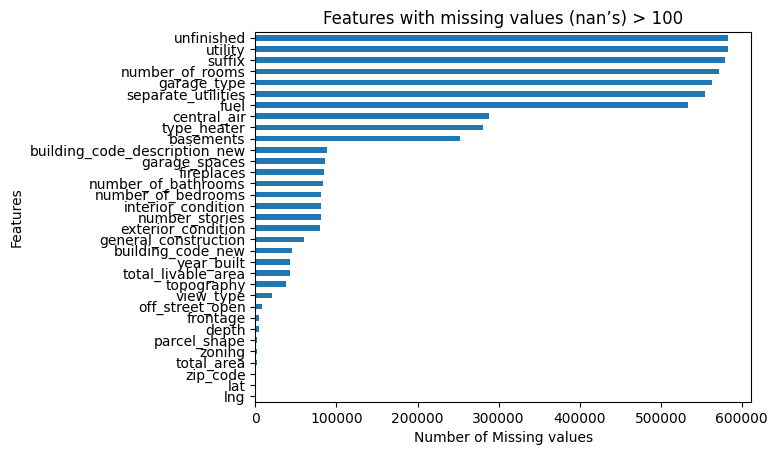

In [313]:
# Visualize missing values in columns
missing = data.isnull().sum()
missing = missing[missing >= 100]
missing.sort_values(inplace=True)
missing.plot.barh()
plt.title("Features with missing values (nan’s) > 100")
plt.ylabel("Features")
plt.xlabel("Number of Missing values")

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Fill in null data

#### Numerical Data
- Category Code
- Depth
- Longitude
- Latitude
- Zipcode
- Exterior Condition
- Fireplaces
- Number of Stories
- Number of bathrooms
- Number of bedrooms
- Number of rooms

#### Categorical
- Basements
- Central Air
- Fuel
- Garage Type
- General Construction
- Parcel Shape
- Separate Utilities
- Suffix
- Topography
- Heater
- Utility
- View Type

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


### Category Code

- Code value: 1 = Single Family
- Code value: 2 = Multi Family
- Code value: 3 = Mixed Use
- Code value: 4 = Commercial
- Code value: 5 = Industrial
- Code value: 6 = Vacant Land

In [314]:
data.category_code.value_counts(dropna=False)

1     463162
6      42106
2      40743
3      14300
4      12836
5       4165
14      2813
10       840
13       834
8        507
9        129
12       119
7         97
15        27
11        19
16        13
Name: category_code, dtype: int64

In [315]:
# Create a mask to drop rows
values_to_drop = [num for num in range(4, 17)]
mask_category_code = data["category_code"].isin(values_to_drop)
data = data.loc[~mask_category_code]

In [316]:
# Code value: 1 = Single Family
# Code value: 2 = Multi Family
# Code value: 3 = Mixed Use
data.category_code.value_counts(dropna=False)

1    463162
2     40743
3     14300
Name: category_code, dtype: int64

In [317]:
data.shape

(518205, 43)

### Depth

In [318]:
data.depth.value_counts(dropna=False)

100.0    33325
0.0      31453
90.0     20033
70.0     15828
60.0     15223
         ...  
504.0        1
336.0        1
557.0        1
596.0        1
488.0        1
Name: depth, Length: 638, dtype: int64

In [319]:
# Delete rows that have a depth of 0
data = data.drop(data[data.depth == 0].index)
data = data.dropna(subset=["depth"])

In [320]:
data.shape

(483630, 43)

### Longitude

In [321]:
# Replace empty longitude values with the mean
data["lng"] = data.lng.fillna(data.lng.mean())

In [322]:
# Convert the longitude values to be positive for machine learning purposes
data.loc[:, "lng"] = data['lng'].abs()

### Latitude


In [323]:
# Replace empty latitude values with the mean
data["lat"] = data.lat.fillna(data.lat.mean())

In [324]:
# Convert the latitude values to be positive for machine learning purposes
data.loc[:, "lat"] = data['lat'].abs()

In [325]:
data.shape

(483630, 43)

### Basements

- [NOTE: REPLACING 'NaN' WITH 'K'] 
- 0 = No Basement [NOTE: REPLACING '0' WITH 'L']
- D = Full – Unknown Finish
- F = Partial - Semi-Finished 
- H = Partial - Unknown Finish
- C = Full - Unfinished
- A = Full - Finished 
- J = Unknown Size - Unfinished
- E = Partial - Finished 
- I = Unknown Size - Finished 
- G = Partial - Unfinished
- B = Full - Semi-Finished

- 1 = ? Replace with M
- 2 = ? Replace with N
- 3 = ? Replace with O
- 4 = ? Replace with P

In [326]:
data.basements.value_counts(dropna=False)


NaN    157326
D      107751
F       64119
H       57380
C       33954
A       27565
E        9951
0        7922
J        7551
G        4352
B        3113
I        2042
1         488
4          91
2          20
3           5
Name: basements, dtype: int64

In [327]:
data.loc[:, "basements"] = data.loc[:, "basements"].fillna('K')
replacement_dict = {'0': 'L', '1': 'M', '2': 'N', '3': 'O', '4': 'P'}
data['basements'] = data['basements'].replace(replacement_dict, regex=True)

### Central Air

In [328]:
data.central_air.value_counts(dropna=False)

NaN    214517
N      163214
Y      104682
0        1078
1         139
Name: central_air, dtype: int64

In [329]:
# Replacing '0' with 'N' (i.e. NO Central Air)
data.loc[:, "central_air"] = data['central_air'].replace('0', 'N')
# Replacing the "NaNs" with 'N'
data.loc[:, "central_air"] = data['central_air'].fillna('N')
# Replacing '1' with 'Y' (i.e. Central Air)
data.loc[:, "central_air"] = data['central_air'].replace('1', 'N')

### Exterior Condition

- 4.0 Average
- 3.0 Above Average
- 5.0 Below Average
- 2.0 Newer Construction / Rehabbed
- 7.0 Sealed / Structurally Compromised
- 6.0 Vacant
- 0.0 Not Applicable

In [330]:
data.exterior_condition.value_counts(dropna=False)

4.0    371682
3.0     40275
5.0     24236
NaN     17139
1.0     12216
2.0     11914
7.0      3454
6.0      2658
0.0        56
Name: exterior_condition, dtype: int64

In [331]:
# Fill in nan with not applicable (0.0)
data.loc[:, "exterior_condition"] = data.loc[:, "exterior_condition"].fillna(0.0)

### Fuel Heating

- A = Natural Gas
- C = Electric
- B = Oil heat
- E = Solar
- G = Other 
- H = None

In [332]:
data.fuel.value_counts(dropna=False)

NaN    439885
A       42484
C         837
B         347
G          44
E          16
H          11
I           6
Name: fuel, dtype: int64

In [333]:
# Replace Nan with other (G)
data.loc[:, "fuel"] = data.loc[:, "fuel"].fillna('G')

### Garage Type

In [334]:
data.garage_type.value_counts(dropna=False)

NaN    465252
3.0      8161
0.0      5109
1.0      3725
2.0      1383
Name: garage_type, dtype: int64

In [335]:
# Replace Nan with no garage (0.0)
data.loc[:, "garage_type"] = data.loc[:, "garage_type"].fillna(0.0)

### General Construction

- A = Common brick 
- B = Brick and Siding 
- E = Stone 
- C = Frame and siding 
- F = Stucco/Cement 
- G = Other/Mix 
- H = Brick and stucco 
- J = Stone/stucco 
- I = Stucco and siding 
- D = Frame and shingle 

In [336]:
data.general_construction.value_counts(dropna=False)

A      406305
B       32083
C       10964
E       10930
F        7258
NaN      4960
H        4712
G        1877
J        1712
I        1141
3        1014
1         284
D         251
5          99
6          27
9          11
8           1
4           1
Name: general_construction, dtype: int64

In [337]:
data["general_construction"].unique()

array(['A ', 'E ', nan, 'B ', 'G ', '1 ', 'F ', 'C ', 'I ', 'H ', 'J ',
       'D ', '3 ', '5 ', '6 ', '9 ', '8 ', '4 '], dtype=object)

In [338]:
# Replace Nan with other (G)
data.loc[:, "general_construction"] = data.loc[:, "general_construction"].fillna("G")
# Replace number with numerical counter part (not sure if this is correct)
replacement_dict = {'1 ': 'A ', '3 ': 'C ', '4 ': 'D ', '5 ': 'E ', '6 ': 'F ', '8 ': 'H ', '9 ': 'I '}
data.loc[:, "general_construction"] = data["general_construction"].replace(replacement_dict)

### Parcel Shape

- E = Rectangular
- A = Other than a square, rectangular or triangle 
- B = Curves, narrow portions, long access driveways 
- C = Triangular 
- F = NaN 
- D = Long and narrow

In [339]:
data.parcel_shape.value_counts(dropna=False)

E      446554
A       31971
B        4202
C         837
D          48
NaN        18
Name: parcel_shape, dtype: int64

In [340]:
# Replacing the "NaN's" with 'F'
data.loc[:, "parcel_shape"] = data['parcel_shape'].fillna('F')

### Seperate Utilities

- D = Non 2 to 4 apartments
- B = Part Separate
- A = Central (heater, hot water tank, electrical, gas)
- C = All seperate (except water)

In [341]:
data.separate_utilities.value_counts(dropna=False)

NaN    460218
B       10478
A        8826
C        4108
Name: separate_utilities, dtype: int64

In [342]:
data.loc[:, "separate_utilities"] = data['separate_utilities'].fillna('D')

### Suffix

- NaN [Replacing NaN’s with N — No suffix needed/provided]
- 2      [Replacing 2 with H (half an address)]
- R      to indicate Rear in address
- A      to indicate Air Rights
- L      Leasehold
- E      

In [343]:
data.suffix.value_counts(dropna=False)

NaN    482825
2         383
R         372
A          48
L           2
Name: suffix, dtype: int64

In [344]:
data["suffix"].unique()

array([nan, '2', 'R', 'L', 'A'], dtype=object)

In [345]:
data.loc[:, "suffix"] = data["suffix"].fillna('N')
data.loc[:, "suffix"] = data["suffix"].replace('2','H')

### Topography

- F = Street level 
- A = Above Street Level 
- E = Other and NaN’s 
- B = Below Street Level 
- C = Flood Plain 
- D = Rocky 

In [346]:
data.topography.value_counts(dropna=False)

F      444991
A       28305
NaN      5338
E        4509
B         231
C         152
D         104
Name: topography, dtype: int64

In [347]:
data.loc[:, "topography"] = data["topography"].fillna('E')

### Heater

- H = Undetermined and NaNs 
- A = Hot air (ducts) 
- B = Hot water (radiators or baseboards) 
- G = Radiant 
- N = None 
- C = Electric baseboard 
- E = Other 
- D = Outside heat pump 

In [348]:
data.type_heater.value_counts(dropna=False)

NaN    196183
H      113768
A      103654
B       59669
G        6475
0        1651
C        1278
E         550
D         402
Name: type_heater, dtype: int64

In [349]:
data.loc[:, "type_heater"] = data["type_heater"].fillna('H')

### Utility

A = None and NaNs 

B = Modernized 

D = Modernized and remodeled 

C = Remodeled (relates to design and floor plan) 

In [350]:
data.utility.value_counts(dropna=False)

NaN    483630
Name: utility, dtype: int64

### View Type

In [351]:
data.view_type.value_counts(dropna=False)

I      454497
A       10307
C        5037
D        3462
0        3305
H        2665
NaN      2261
E        1933
B         163
Name: view_type, dtype: int64

In [352]:
data.loc[:, "view_type"] = data["view_type"].fillna('N')

### Fireplaces

In [369]:
data.fireplaces.value_counts(dropna=False)

0.0     459905
1.0      10039
2.0       1198
3.0        407
5.0        142
4.0         86
10.0         1
Name: fireplaces, dtype: int64

In [354]:
data.loc[:, "fireplaces"] = data["fireplaces"].fillna(0.0)

### Number Stories

In [372]:
data.number_stories.value_counts(dropna=False)

2.0    337287
1.0     59234
3.0     57980
0.0     16236
4.0      1024
5.0        10
6.0         6
Name: number_stories, dtype: int64

In [356]:
data["number_stories"].unique()

array([nan,  1.,  2.,  3.,  4.,  0.,  5.,  6.])

In [357]:
data.loc[:, "number_stories"] = data["number_stories"].fillna(0.0)

### Number of rooms

- Missing to much data. Doesnt make sense to take the mean of the rooms.

In [385]:
data.number_of_rooms.value_counts(dropna=False)

NaN     462159
6.0       5118
7.0       1390
5.0        839
8.0        610
10.0       387
12.0       309
9.0        231
11.0        63
4.0         59
18.0        40
15.0        40
3.0         33
14.0        32
13.0        25
16.0        15
20.0        15
17.0         6
21.0         4
2.0          3
28.0         3
24.0         2
1.0          1
19.0         1
30.0         1
23.0         1
22.0         1
25.0         1
27.0         1
Name: number_of_rooms, dtype: int64

### Number of bedrooms

In [384]:
data.number_of_bedrooms.value_counts(dropna=False)

3.0     298613
0.0      88453
4.0      47983
2.0      26791
5.0       5194
6.0       2819
7.0        499
8.0        431
1.0        353
9.0        203
10.0        51
Name: number_of_bedrooms, dtype: int64

In [360]:
data["number_of_bedrooms"].mean()

2.5172411574597304

In [361]:
# Replace with the mean
data.loc[:, "number_of_bedrooms"] = data["number_of_bedrooms"].fillna(3.0)

### Number of bathrooms

In [379]:
data.number_of_bathrooms.value_counts(dropna=False)

1.0    326273
0.0     89123
2.0     43321
3.0     10087
4.0      2057
5.0       356
6.0       280
Name: number_of_bathrooms, dtype: int64

In [363]:
data.loc[:, "number_of_bathrooms"].mean()

0.9695554846278597

In [364]:
data.loc[:, "number_of_bathrooms"] = data["number_of_bathrooms"].fillna(1.0)

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
# Remove Outliers

#### Numerical Data
- Depth
- Fireplaces
- Number of Stories
- Number of bathrooms
- Number of bedrooms
- Number of rooms


# Depth

In [365]:
# Calculate Q1, Q3, and IQR
q1 = np.percentile(data["depth"], 25)
q3 = np.percentile(data["depth"], 75)
iqr = q3 - q1

# Define lower and upper bounds
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr


In [366]:
data = data[(data['depth'] > lower_bound) & (data['depth'] < upper_bound)]

# Fireplace

In [370]:
data = data[(data["fireplaces"] >= 0.0) & (data["fireplaces"] <= 5.0) ]

In [371]:
data.shape

(471777, 43)

# Number of Stories

In [373]:
data = data[(data["number_stories"] >= 0.0) & (data["number_stories"] <= 4.0) ]

In [374]:
data.shape

(471761, 43)

# Number of Bathrooms

In [377]:
data = data[(data["number_of_bathrooms"] >= 0.0) & (data["number_of_bathrooms"] <= 6.0)]

In [378]:
data.shape

(471497, 43)

# Number of Bedrooms

In [382]:
data = data[(data["number_of_bedrooms"] >= 0.0) & (data["number_of_bedrooms"] <= 10.0)]

In [383]:
data.shape

(471390, 43)